In [5]:
cd ~/work/waroncars

/media/wintermute/work/waroncars


In [6]:
plt = plotter()
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [7]:
import seaborn as sns

In [8]:
import analyzer

In [9]:
paths = analyzer.date_range(min_time='20211229T00:00:00')

In [10]:
tracks = analyzer.load_track(paths)

In [12]:
info = analyzer.track_info(data=tracks).sort_values(by='time')
info['hour'] = info['time'].dt.hour

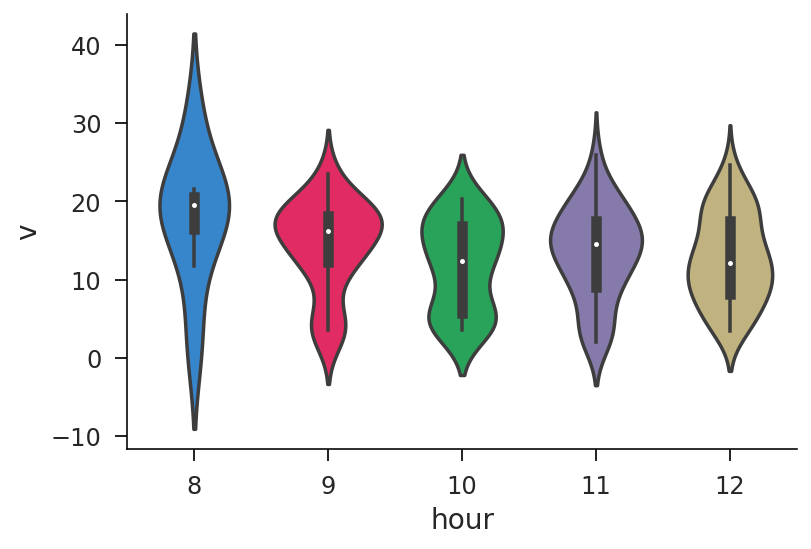

In [14]:
sns.violinplot(x='hour', y='v', data=info);